In [32]:
import numpy as np
import scipy.linalg as sa
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 1

In [33]:
# Initialize X matrix
X = np.matrix([[2,2], [1,1], [0, 5]])
print(X)

# Delete any Xi = 0
idx = np.argwhere(np.all(X[..., :] == 0, axis=0))
X = np.delete(X, idx, axis = 1)

# Generate first orthonormal basis vector
U1 = X[:, 0]
U1 = U1 / la.norm(U1)
U = U1

for i in range(1, np.shape(X)[1]):
    proj_xi_on_U = U@U.T@X[:, i]
    X_resid = X[:, i] - proj_xi_on_U
    if not np.all(X_resid == 0): # if the residual is not 0
        U_i = X_resid / la.norm(X_resid)
        U = np.concatenate((U, U_i), axis = 1)

print(U)

[[2 2]
 [1 1]
 [0 5]]
[[8.94427191e-01 4.44089210e-17]
 [4.47213595e-01 2.22044605e-17]
 [0.00000000e+00 1.00000000e+00]]


## Question 6

In [140]:
import scipy.io
import numpy as np
mat = scipy.io.loadmat('fisheriris.mat')
species =np.array(mat.get('species'))
meas =np.array(mat.get('meas'))
meas = meas[:, :3]
species_num=species
species_num[species_num=='setosa']=-1
species_num[species_num=='versicolor']=0
species_num[species_num=='virginica']=1

dataset=np.c_[meas,species_num]  

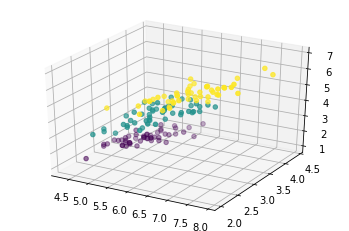

In [142]:
%matplotlib inline
ax = plt.gca(projection='3d')
ax.scatter(meas.T[0], meas.T[1], meas.T[2], c=species_num)

In [74]:
a=np.array([5,3.5,1.5])
b=np.array([6,2.8,4])
c=np.array([6.5,3,5.5])

In [97]:
u=b-a
v=b-c
print(u,v)

[ 1.  -0.7  2.5] [-0.5 -0.2 -1.5]


In [90]:
A=np.array([u,v]).T

In [92]:
P=A@np.linalg.inv(A.T@A)@A.T

In [94]:
projected_data=meas@P

In [95]:
projected_data

array([[0.61382114, 2.77642276, 2.99186992],
       [0.65745257, 2.31571816, 2.90542005],
       [0.57226739, 2.53423668, 2.76467931],
       [0.63468835, 2.4604336 , 2.90704607],
       [0.58663053, 2.88816621, 2.96603433],
       [0.68979223, 3.14028907, 3.37136405],
       [0.56187895, 2.74869015, 2.83288166],
       [0.64543812, 2.69765131, 3.04516712],
       [0.60551039, 2.28798555, 2.7464318 ],
       [0.67425474, 2.41842818, 2.99945799],
       [0.6561879 , 2.93486902, 3.18328817],
       [0.6498645 , 2.73062331, 3.07262873],
       [0.64426378, 2.32971996, 2.87461608],
       [0.48590786, 2.38482385, 2.45338753],
       [0.57452575, 3.15718157, 3.05420054],
       [0.59774164, 3.5770551 , 3.31047877],
       [0.56657633, 3.12041554, 3.01508582],
       [0.61382114, 2.77642276, 2.99186992],
       [0.74336043, 3.00054201, 3.45880759],
       [0.60261969, 3.07461608, 3.09584463],
       [0.75980126, 2.65158085, 3.34652213],
       [0.6166215 , 2.97687444, 3.09087624],
       [0.

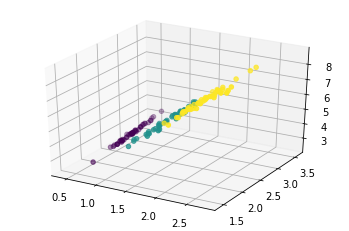

In [143]:
%matplotlib inline
ax2 = plt.gca(projection='3d')
ax2.scatter(projected_data.T[0], projected_data.T[1], projected_data.T[2], c=species_num)

In [106]:
projected_data

array([[0.61382114, 2.77642276, 2.99186992],
       [0.65745257, 2.31571816, 2.90542005],
       [0.57226739, 2.53423668, 2.76467931],
       [0.63468835, 2.4604336 , 2.90704607],
       [0.58663053, 2.88816621, 2.96603433],
       [0.68979223, 3.14028907, 3.37136405],
       [0.56187895, 2.74869015, 2.83288166],
       [0.64543812, 2.69765131, 3.04516712],
       [0.60551039, 2.28798555, 2.7464318 ],
       [0.67425474, 2.41842818, 2.99945799],
       [0.6561879 , 2.93486902, 3.18328817],
       [0.6498645 , 2.73062331, 3.07262873],
       [0.64426378, 2.32971996, 2.87461608],
       [0.48590786, 2.38482385, 2.45338753],
       [0.57452575, 3.15718157, 3.05420054],
       [0.59774164, 3.5770551 , 3.31047877],
       [0.56657633, 3.12041554, 3.01508582],
       [0.61382114, 2.77642276, 2.99186992],
       [0.74336043, 3.00054201, 3.45880759],
       [0.60261969, 3.07461608, 3.09584463],
       [0.75980126, 2.65158085, 3.34652213],
       [0.6166215 , 2.97687444, 3.09087624],
       [0.

In [110]:
coor=np.linalg.inv(A[:2][:])@projected_data.T[:2][:]

In [207]:
setosa_=coor.T[:50]
versicolor_=coor.T[50:100]
virginica_=coor.T[100:]
np.random.shuffle(setosa_)
np.random.shuffle(versicolor_)
np.random.shuffle(virginica_)
x_train=np.vstack([setosa_[0:40],versicolor_[0:40],virginica_[0:40]])
x_test=np.vstack([setosa_[40:],versicolor_[40:],virginica_[40:]])
y_train=np.vstack([species_num[0:40],species_num[50:90],species_num[100:140]])
y_test=np.vstack([species_num[40:50],species_num[90:100],species_num[140:]])

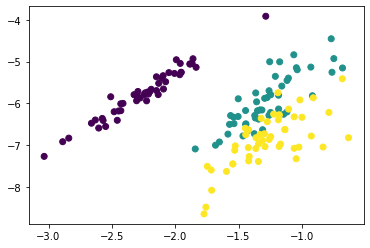

In [134]:
%matplotlib inline
plt.scatter(coor[0],coor[1],c=species_num)

In [208]:
A2=x_train
P2=np.linalg.inv(A2.T@A2)@A2.T@y_train

In [209]:
res=x_test@P2

In [210]:
res[res<=-0.5]=-1
res[(res>-0.5) & (res<=0.5)]=0
res[res>0.5]=1

In [211]:
avg_error=np.count_nonzero(y_test.flatten()-res.flatten())/30
print(avg_error)

0.2


## Question 7

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import sys
d = sio.loadmat("face_emotion_data.mat") 
X = d["X"]
y = d["y"]
n, p = np.shape(X)
# error rate for regularized least squares
error_RLS = np.zeros((8, 7))
# error rate for truncated SVD
error_SVD = np.zeros((8, 7))

In [17]:
dataset = np.concatenate((X, y), axis = 1)

In [7]:
def SVD_test(dataset):
    # SVD parameters to test
    k_vals = np.arange(9) + 1 

    # Column index 
    col_idx = np.shape(dataset)[1] - 1
    
    # All errors
    all_final_errors = []

    for i in range(8):
        holdout = dataset[np.arange(16 * i , 16 * (i+1))]
        x_holdout = holdout[:, :col_idx]
        y_holdout = holdout[:, col_idx]

        leftover = dataset[np.concatenate((np.arange(0, 16 * i), np.arange(16 * (i+1), 128)))]

        for j in range(7):
            regularizer = leftover[np.arange(16 * (j), 16 * (j+1))]
            train = leftover[np.concatenate((np.arange(0, 16 * j), np.arange(16 * (j+1), 112)))]

            x_regularizer = regularizer[:, :col_idx]
            y_regularizer = regularizer[:, col_idx]
            x_train = train[:, :col_idx]
            y_train = train[:, col_idx]

            U, S, V = la.svd(x_train)

            best_error = float('inf')
            best_w = None

            for k in k_vals:
                pseudo = np.diag(1 / S[:k])
                pseudo_matrix = np.zeros((np.shape(V)[0], np.shape(U)[0]), dtype=complex)
                pseudo_matrix[:k, :k] = pseudo
                w = V@pseudo_matrix@U.T@y_train
                y_hat = np.sign(x_regularizer@w)
                error = np.mean(y_hat != y_regularizer)

                # finding best w_k
                if error < best_error:
                    best_error = error
                    best_w = w

            pred_y = np.sign(x_holdout@best_w)
            final_error = np.mean(pred_y != y_holdout)
            all_final_errors.append(final_error)
        
    return np.mean(all_final_errors)

In [11]:
def RLS_test(dataset):
    # RLS parameters to test
    lambda_vals = np.array([0, 0.5, 1, 2, 4, 8, 16]) 

    # Column index 
    col_idx = np.shape(dataset)[1] - 1
    
    # All errors
    all_final_errors = []

    for i in range(8):
        holdout = dataset[np.arange(16 * i , 16 * (i+1))]
        x_holdout = holdout[:, :col_idx]
        y_holdout = holdout[:, col_idx]

        leftover = dataset[np.concatenate((np.arange(0, 16 * i), np.arange(16 * (i+1), 128)))]

        for j in range(7):
            regularizer = leftover[np.arange(16 * (j), 16 * (j+1))]
            train = leftover[np.concatenate((np.arange(0, 16 * j), np.arange(16 * (j+1), 112)))]

            x_regularizer = regularizer[:, :col_idx]
            y_regularizer = regularizer[:, col_idx]
            x_train = train[:, :col_idx]
            y_train = train[:, col_idx]

            U, S, V = la.svd(x_train)

            best_error = float('inf')
            best_w = None

            sigma = np.zeros((np.shape(U)[0], np.shape(V)[0]), dtype=complex)
            sigma[:np.shape(V)[0], :np.shape(V)[0]] = np.diag(S)

            for lambda_ in lambda_vals:
                w = V@la.inv(sigma.T@sigma + lambda_ * np.identity(np.shape(V)[0]))@sigma.T@U.T@y_train
                y_hat = np.sign(x_regularizer@w)
                error = np.mean(y_hat != y_regularizer)

                # finding best w_k
                if error < best_error:
                    best_error = error
                    best_w = w

            pred_y = np.sign(x_holdout@best_w)
            final_error = np.mean(pred_y != y_holdout)
            all_final_errors.append(final_error)
        
    return np.mean(all_final_errors)

In [27]:
print("Average error rate using truncated  SVD is", SVD_test(dataset))

Average error rate using truncated  SVD is 0.3984375


In [28]:
print("Average error rate using RLS", RLS_test(dataset))

Average error rate using RLS 0.5011160714285714


In [32]:
augment = X@np.random.randn(9,3)
augmented_dataset = np.concatenate((X, augment, y), axis = 1)

In [33]:
print("Average error rate using truncated SVD and 12 features is", SVD_test(augmented_dataset))

Average error rate using truncated SVD and 12 features is 0.3984375


In [34]:
print("Average error rate using RLS and 12 features is", RLS_test(augmented_dataset))

Average error rate using RLS and 12 features is 0.40066964285714285
